### 상수 텐서와 변수

모두 1 또는 0 인 텐

In [1]:
import tensorflow as tf

x = tf.ones(shape = (2, 1))
print(x)


tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x  = tf.zeros(shape = (2,1))
print(x)


tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


랜덤 텐서

In [3]:
x = tf.random.normal(shape = (3, 1), mean = 0., stddev = 1.)
print(x)

tf.Tensor(
[[ 0.06624141]
 [ 1.1889273 ]
 [-1.5460281 ]], shape=(3, 1), dtype=float32)


In [4]:
# 균일 분포 에서 랜덤한 값들을 생성
# 딥러닝 모델을 초기화 하거나 랜덤한 텐서를 생성하는데 유용하게 사용

x = tf.random.uniform(shape = (3,1), minval = 0., maxval = 1.)

print(x)

tf.Tensor(
[[0.7328547]
 [0.3193109]
 [0.1761533]], shape=(3, 1), dtype=float32)


### 넘파이 배열에 값 할당하기

In [5]:
import numpy as np
x = np.ones(shape = (2, 2))
x[0, 0] = 0.

In [6]:
x

array([[0., 1.],
       [1., 1.]])

In [7]:
# 텐서플로우 텐서에 값을 numpy 와 다르게 할당하지 못함 -> 변수를 만들려면 랜덤 텐서와 같이 초기값을 제공해야함

x = tf.ones(shape = (2, 3))
x[0, 0] = 0.

TypeError: ignored

텐서플로 변수 만들기

In [8]:
# tf.Variable은 수정 가능한 상태를 관리하기 위한 클래스

import tensorflow as tf

v = tf.Variable(initial_value = tf.random.normal(shape = (3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.3805107 ],
       [-0.46144196],
       [ 1.2395079 ]], dtype=float32)>


텐서 플로 변수에 값 할당하기

In [9]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

변수 일부에 값 할당하기

In [10]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

assign_add 사용하기

In [11]:
# assign_add() += 와 동일

v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

### 텐서 연산: 텐서플로에서 수학 계산하기

기본적인 수학 연산

In [14]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [16]:
print(a)
print(b)
print(c)
print(d)
print(e)
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


### GradientTape API 다시 살펴보기

**`GradientTape` 사용하기**
- GradientTape은 TensorFlow의 핵심 기능 중 하나로, 자동 미분을 수행하기 위해 사용되는 도구입니다.
- TensorFlow는 그래디언트(gradient)를 계산하는 데에 GradientTape을 활용하여 연산 과정을 기록




In [17]:
# tensorflow 를 사용하여 변수 input_var 의 제곱에 대한 그래디언트(기울기) 계산
# result 는 input_var 의 제곱이므로 이 미분값은 2 * input_var 가 됩니다 input_var의 초기값이 3 이므로 gradient 는 6

input_var = tf.Variable(initial_value = 3.)

# tf.GradientTape 을 사용하여 GradientTape 컨텍스트를 생성, 이제부터 tape을 사용하여 연산을 기록

with tf.GradientTape() as tape :
  result = tf.square(input_var)

gradient = tape.gradient(result, input_var) # tape.gradient를 사용하여 result 에 대한 input_var 의 그래디언트를 계산

In [18]:
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

상수 입력 텐서와 함께 GradientTape 사용하기

In [19]:
# 그래디언트를 계산하려면 미분 대상이 되는 텐서가 관찰 대상으로 지정되어야 하는데
# 텐서플로우 변수는 기본적으로 자동으로 관찰대상이 됩니다
# 그러나 상수나 일반 텐서는 그렇지 않기 때문에 이들에 대해 그래디언트를 계산하려면 가장 먼저 tape.watch() 함수를 사용하여
# 그 텐서를 관찰 대상으로 지정

input_const = tf.constant(3.)

with tf.GradientTape() as tape :
  tape.watch(input_const)
  result = tf.square(input_const)

gradient = tape.gradient(result, input_const) # 여기서 미분하는것은 상수가 아니라 상수 값을 가진 텐서에 대한 함수

#### 물리학에서 위치, 속도, 그리고 가속도는 서로 미분과 적분을 통해 연결
- 위치(position)는 시간에 대해 미분하면 속도(velocity)가 된다. 이는 위치가 시간에 따라 어떻게 변하는지를 나타내며, 이 변화율이 바로 속도이다. 즉, 위치의 그레디언트(미분값)는 속도이다.
- 속도를 시간에 대해 미분하면 가속도(acceleration)가 된다. 속도가 시간에 따라 어떻게 변하는지를 나타내며, 이 변화율이 바로 가속도이다. 즉, 속도의 그레디언트(미분값)는 가속도이다.
- 따라서, 위치의 두 번째 시간에 대한 미분값(이계도 그레디언트)은 가속도가 된다.

#### 그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기
- TensorFlow를 사용하여 시간(time)에 따른 위치(position)와 속도(speed)의 변화를 모델링하고, 그에 대한 가속도(acceleration)를 계산하는 예시
- 첫 번째 줄에서는 TensorFlow 변수 time을 생성하고, 초기값을 0.0으로 설정.
- 두 번째 줄에서는 tf.GradientTape()를 사용하여 outer_tape라는 GradientTape 컨텍스트를 생성합니다. outer_tape를 사용하여 가속도에 대한 그래디언트를 계산.
- 세 번째 줄에서는 inner_tape라는 또 다른 GradientTape 컨텍스트를 생성합니다. inner_tape를 사용하여 위치에 대한 그래디언트를 계산.
- 네 번째 줄에서는 position 변수에 4.9 * time ** 2의 연산 결과를 할당합니다. 이 때, 이 연산은 inner_tape 컨텍스트 내에서 기록.
- 다섯 번째 줄에서는 inner_tape.gradient()를 사용하여 position에 대한 time의 그래디언트를 계산합니다. 이를 통해 위치에 대한 시간의 변화율, 즉 속도를 구한다.
- 여섯 번째 줄에서는 outer_tape.gradient()를 사용하여 speed에 대한 time의 그래디언트를 계산합니다. 이를 통해 속도에 대한 시간의 변화율, 즉 가속도를 구한다.

따라서 acceleration에는 time에 대한 speed의 그래디언트가 저장된다.
결과적으로, 이 코드는 시간에 따른 위치를 모델링하고, 이를 기반으로 속도와 가속도를 계산한다. time 변수의 값이 변할 때 위치, 속도 및 가속도의 변화율을 계산하여 모델을 업데이트할 수 있다.

In [27]:
time = tf.Variable(0.)

with tf.GradientTape() as outer_tape :

  with tf.GradientTape() as inner_tape :
    position = 4.9 * time ** 2

  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [28]:
print(position)
print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


엔드 투 엔드 예제 : 텐서플로 선형 분류기

2D 평면에 두 클래스의 랜덤한 포인트 생성하기

In [50]:
import numpy as np

num_samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

In [51]:
# 두 개의 배열을 수직으로 쌓아서 하나의 배열로
# negative_samples 배열의 shape이 (N, M)이고 positive_samples 배열의 shape이 (K, M)라고 가정
# 새로운 배열의 shape은 ((N+K), M)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [65]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = 'float32'),
                     np.ones((num_samples_per_class, 1), dtype = 'float32')))

In [67]:
print(negative_samples)

[[ 1.57290392  4.62015677]
 [-0.99886575  2.16287075]
 [ 2.03089641  4.71609112]
 ...
 [-1.36938771  1.75644435]
 [-0.65841277  0.57649061]
 [ 1.68715969  4.13307854]]


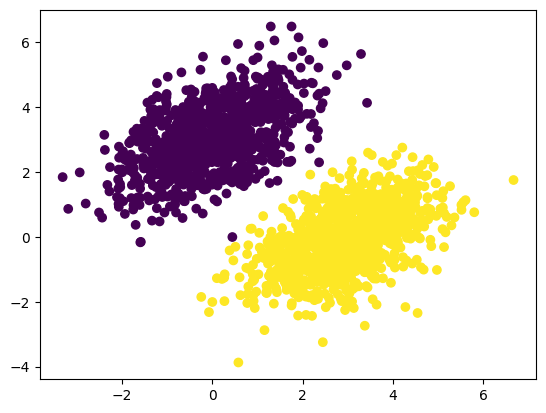

In [93]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:, 0])

plt.show()

In [88]:
input_dim = 2
output_dim = 1

w = tf.Variable(initial_value = tf.random.uniform(shape = (input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape = (output_dim,)))

In [91]:
print(w)
print(b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.06683075],
       [0.2966931 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [55]:
# 선형 변환은 기계 학습에서 중요한 개념으로, 선형 모델이나 신경망에서 가장 기본적인 연산 중 하나입니다.
# 선형 변환을 통해 데이터의 특성을 잘 반영하고, 모델이 입력과 출력 간의 관계를 학습할 수 있도록 돕습니다.

def model(inputs) :
  return tf.matmul(inputs, w) + b

In [56]:
# 평균 제곱 손실(Mean Squared Loss)을 계산
# targets - predictions을 통해 각 샘플에 대한 예측 오차를 계산합니다.
# tf.square 함수를 사용하여 예측 오차의 제곱을 계산합니다. 이는 예측 오차의 절대값을 양수로 만들기 위함입니다.
# per_sample_losses는 각 샘플에 대한 손실 값을 포함하는 텐서입니다.
# tf.reduce_mean 함수를 사용하여 per_sample_losses의 평균을 계산합니다. 이는 모든 샘플의 손실 값을 평균한 평균 제곱 손실 값을 얻는 것을 의미합니다.

def square_loss(targets, predictions) :
  per_sample_losses = tf.square(targets - predictions)

  return tf.reduce_mean(per_sample_losses)

In [57]:
# tf.GradientTape()를 사용하여 연산을 기록합니다. 이는 후속의 연산을 추적하여 그래디언트(기울기)를 계산하는 데 사용됩니다.
# model(inputs)를 호출하여 입력 데이터에 대한 예측값 predictions을 계산합니다.
# square_loss(targets, predictions)를 호출하여 예측값과 목표값 간의 손실을 계산합니다.
# tape.gradient(loss, [w, b])를 호출하여 손실에 대한 가중치 w와 편향 b에 대한 그래디언트를 계산합니다.
# w.assign_sub(grad_loss_wrt_w * learning_rate)와 b.assign_sub(grad_loss_wrt_b * learning_rate)를 사용하여 가중치와 편향을 그래디언트의 방향으로 업데이트합니다.
# 이때, assign_sub 메소드는 현재 가중치와 편향에서 그래디언트의 곱과 학습률(learning_rate)을 곱한 값을 뺀 새로운 값을 할당합니다.

learning_rate = 0.1

def training_step(inputs, targets) :
  with tf.GradientTape() as tape :
    predictions = model(inputs)
    loss = square_loss(targets, predictions)

  grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [w, b])
  w.assign_sub(grad_loss_wrt_w * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)

  return loss

In [58]:
for step in range(40) :
  loss = training_step(inputs, targets)

  print(f'{step} 번째 스텝 손실 : {loss: .4f}')

0 번째 스텝 손실 :  6.2084
1 번째 스텝 손실 :  0.7171
2 번째 스텝 손실 :  0.2214
3 번째 스텝 손실 :  0.1489
4 번째 스텝 손실 :  0.1307
5 번째 스텝 손실 :  0.1201
6 번째 스텝 손실 :  0.1113
7 번째 스텝 손실 :  0.1034
8 번째 스텝 손실 :  0.0962
9 번째 스텝 손실 :  0.0896
10 번째 스텝 손실 :  0.0837
11 번째 스텝 손실 :  0.0782
12 번째 스텝 손실 :  0.0733
13 번째 스텝 손실 :  0.0688
14 번째 스텝 손실 :  0.0648
15 번째 스텝 손실 :  0.0611
16 번째 스텝 손실 :  0.0577
17 번째 스텝 손실 :  0.0546
18 번째 스텝 손실 :  0.0519
19 번째 스텝 손실 :  0.0493
20 번째 스텝 손실 :  0.0470
21 번째 스텝 손실 :  0.0449
22 번째 스텝 손실 :  0.0430
23 번째 스텝 손실 :  0.0413
24 번째 스텝 손실 :  0.0397
25 번째 스텝 손실 :  0.0383
26 번째 스텝 손실 :  0.0370
27 번째 스텝 손실 :  0.0358
28 번째 스텝 손실 :  0.0348
29 번째 스텝 손실 :  0.0338
30 번째 스텝 손실 :  0.0329
31 번째 스텝 손실 :  0.0321
32 번째 스텝 손실 :  0.0314
33 번째 스텝 손실 :  0.0307
34 번째 스텝 손실 :  0.0301
35 번째 스텝 손실 :  0.0295
36 번째 스텝 손실 :  0.0290
37 번째 스텝 손실 :  0.0286
38 번째 스텝 손실 :  0.0282
39 번째 스텝 손실 :  0.0278


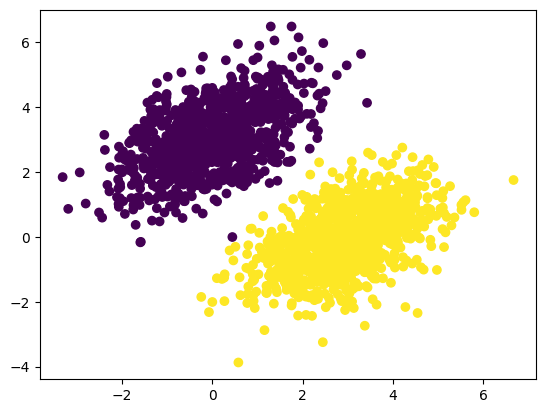

In [59]:
# 0.5는 이진분류 임계값

predictions = model(inputs)

plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)

plt.show()

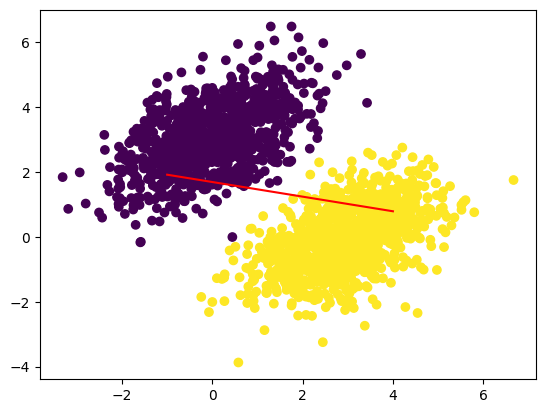

In [94]:
x = np.linspace(-1, 4, 100)
y = - w[0] / w[1] * x + (0.5 - b) / w[1]

plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)

plt.show()

### 신경망의 구조 : 핵심 keras API 이해하기

In [72]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer) :

  def __init__(self, units, activation = None) :
    super().__init__()
    self.units = units
    self.activation = activation

  def build(self, input_shape) :
    input_dim = input_shape[-1]
    self.w = self.add_weight(shape = (input_dim, self.units),
                             initializer = 'random_normal')
    self.b = self.add_weight(shape = (self.units,),
                             initializer = 'zeros')

  def call(self, inputs) :
    y = tf.matmul(inputs, self.w) + self.b
    if self.activation is not None :
      y = self.activation(y)

    return y

In [73]:
my_dense = SimpleDense(units = 32, activation = tf.nn.relu)
input_tensor = tf.ones(shape = (2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [74]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation = 'relu')

In [77]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32)
])

In [87]:
class NaiveDense :

  def __init__(self, input_size, output_size, activation) :
    self.activation = activation

    w_shape = (input_size, output_size)
    w_initial_value = tf.random.uniform(w_shape, minval = 0, maxval = 1)
    self.w = tf.Variable(w_initial_value)

    b_shape = (output_size,)
    b_initial_value = tf.zeros(b_shape)
    self.b = tf.Variable(b_initial_value)

  def __call__(self, inputs) :
    return self.activation(tf.matmul(inputs, self.w) + self.b)

  @property
  def weights(self) :
    return [self.w, self.b]

class NaiveSequential :

  def __init__(self, layers) :
    self.layers = layers

  def __call__(self, inputs) :
    x = inputs

    for layer in self.layers :
      x = layer(x)

    return x

  @property

  def weights(self) :
    weights = []

    for layer in self.layers :
      weights += layer.weights

    return weights

model = NaiveSequential([
    NaiveDense(input_size = 784, output_size = 32, activation = 'relu'),
    NaiveDense(input_size = 32, output_size = 64, activation = 'relu'),
    NaiveDense(input_size = 64, output_size = 32, activation = 'relu'),
    NaiveDense(input_size = 32, output_size = 10, activation = 'softmax'),

])

In [80]:
def __call__(self, inputs) :
  if not self.built :
    self.build(inputs.shape)
    self.built = True

  return self.call(inputs)

In [81]:
model = keras.Sequential([
    SimpleDense(32, activation = 'relu'),
    SimpleDense(64, activation = 'relu'),
    SimpleDense(32, activation = 'relu'),
    SimpleDense(10, activation = 'softmax')
])

In [82]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer = 'rmsprop',
              loss = 'mean_squared_error',
              metrics = ['accuacy'])

In [83]:
model.compile(optimizer = keras.optimizers.RMSprop(),
              loss = keras.losses.MeanSquaredError(),
              metrics = [keras.metrics.BinaryAccuracy()])

In [84]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate = 1e-4),
              loss = my_custom_loss,
              metrics = [my_custom_metric_1, my_custom_metric_2])

NameError: ignored

In [85]:
model = keras.Sequential([keras.layers.Dense(1)])

model.compile(optimizer = keras.optimizers.RMSprop(),
              loss = keras.losses.MeanSquaredError(),
              metrics = [keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

model.fit(
    training_inputs,
    training_targets,
    epochs = 5,
    batch_size = 16,
    validation_data = (val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 3s 5ms/step - loss: 8.8077 - binary_accuracy: 0.1007 - val_loss: 7.2916 - val_binary_accuracy: 0.1183
Epoch 2/5
88/88 [==============================] - 0s 4ms/step - loss: 7.3427 - binary_accuracy: 0.1150 - val_loss: 5.9881 - val_binary_accuracy: 0.1417
Epoch 3/5
88/88 [==============================] - 0s 4ms/step - loss: 6.0659 - binary_accuracy: 0.1357 - val_loss: 4.8369 - val_binary_accuracy: 0.1650
Epoch 4/5
88/88 [==============================] - 0s 4ms/step - loss: 4.9131 - binary_accuracy: 0.1521 - val_loss: 3.8232 - val_binary_accuracy: 0.2033
Epoch 5/5
88/88 [==============================] - 0s 4ms/step - loss: 3.8954 - binary_accuracy: 0.1714 - val_loss: 2.9534 - val_binary_accuracy: 0.2383
